In [12]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Input, Dropout, Conv2D,Activation
from keras.utils import np_utils
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

sns.set(style='white', context='notebook', palette='deep')

In [13]:
dirs = os.listdir("./data/")
print (dirs)

['horses', 'cats', 'dogs', 'Humans']


In [14]:
path = "./data/"

In [15]:
images = []
labels = []

In [16]:
label_dicts = {"horses":0, "cats":1, "dogs":2, "Humans":3}

In [17]:
for ix in dirs:
    class_path = path + ix + "/"
    img_names = os.listdir(class_path)
    for im in img_names:
        im = image.load_img(class_path + im, target_size=(224,224))
        im_array = image.img_to_array(im)
        images.append(im_array)
        labels.append(label_dicts[ix])
        
print (len(images), len(labels))

808 808


In [18]:
combined = list(zip(images,labels))
random.shuffle(combined)

images[:],labels[:] = zip(*combined) 

In [19]:
print(labels[:10])

[2, 3, 3, 0, 2, 2, 0, 1, 1, 1]


In [20]:
X_train = np.array(images)
y_train = np.array(labels)
y_train = np_utils.to_categorical(y_train)
print (X_train.shape, y_train.shape)

(808, 224, 224, 3) (808, 4)


In [21]:
def swish(x):                   #defining a function for swish activation function
    return (K.sigmoid(x) * x)

get_custom_objects().update({'swish': Activation(swish)})

W0531 21:26:41.144787 139670119651136 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [22]:
res_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))

W0531 21:26:43.653373 139670119651136 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0531 21:26:43.657188 139670119651136 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0531 21:26:43.676570 139670119651136 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0531 21:26:43.677175 139670119651136 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.Co

In [23]:
res_model.summary()
get_custom_objects().update({'swish': Activation(swish )})

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [24]:
## model1
c1 = Conv2D(1, (3,3), activation='swish')(res_model.output)
f1 = Flatten()(c1)
fc1 = Dense(4, activation='softmax')(f1)

model = Model(inputs=res_model.inputs, outputs=fc1)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [25]:
## Model2
avg = GlobalAveragePooling2D()(res_model.output)
fc1 = Dense(256, activation='swish')(avg)
fc2 = Dense(4, activation='softmax')(fc1)

model = Model(inputs=res_model.inputs, outputs=fc2)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [26]:
for ix,layers in enumerate(model.layers):
    print (ix, layers)

0 <keras.engine.input_layer.InputLayer object at 0x7f06f0b6fb70>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7f076270bd30>
2 <keras.layers.convolutional.Conv2D object at 0x7f076270b978>
3 <keras.layers.normalization.BatchNormalization object at 0x7f06ea097e80>
4 <keras.layers.core.Activation object at 0x7f06ea097d68>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7f06e981e8d0>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f06e9863d30>
7 <keras.layers.convolutional.Conv2D object at 0x7f06e984af60>
8 <keras.layers.normalization.BatchNormalization object at 0x7f06e01a43c8>
9 <keras.layers.core.Activation object at 0x7f06e0147c88>
10 <keras.layers.convolutional.Conv2D object at 0x7f06e0147d30>
11 <keras.layers.normalization.BatchNormalization object at 0x7f06e00fdda0>
12 <keras.layers.core.Activation object at 0x7f06e00bd630>
13 <keras.layers.convolutional.Conv2D object at 0x7f06cd55dfd0>
14 <keras.layers.convolutional.Conv2D object at 0x7f06cd57eac8>
15 <keras.lay

In [27]:
for ix in range(171):
    model.layers[ix].trainable = False

In [28]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [29]:
adam = Adam(lr=0.00003)

In [30]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

W0531 21:27:11.023458 139670119651136 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [31]:
hist = model.fit(X_train,y_train,epochs=5,shuffle=True,batch_size=64,validation_split=0.20)

W0531 21:27:12.116178 139670119651136 deprecation.py:323] From /home/inderpreet/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 646 samples, validate on 162 samples
Epoch 1/5
646/646 [==============================] - 9s 13ms/step - loss: 1.1309 - acc: 0.5341 - val_loss: 0.9657 - val_acc: 0.6049
Epoch 2/5
646/646 [==============================] - 4s 7ms/step - loss: 0.6773 - acc: 0.8390 - val_loss: 0.6434 - val_acc: 0.7716
Epoch 3/5
646/646 [==============================] - 4s 7ms/step - loss: 0.4220 - acc: 0.9427 - val_loss: 0.4485 - val_acc: 0.8272
Epoch 4/5
646/646 [==============================] - 4s 7ms/step - loss: 0.2957 - acc: 0.9644 - val_loss: 0.3419 - val_acc: 0.8951
Epoch 5/5
646/646 [==============================] - 4s 7ms/step - loss: 0.2210 - acc: 0.9737 - val_loss: 0.2960 - val_acc: 0.8951


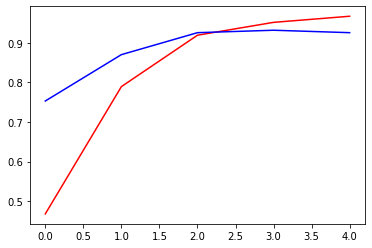

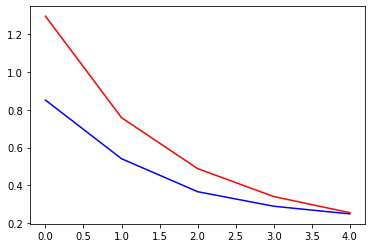

In [20]:
## No_finetuning

plt.figure(0)
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'b')

plt.figure(1)
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')

plt.show()

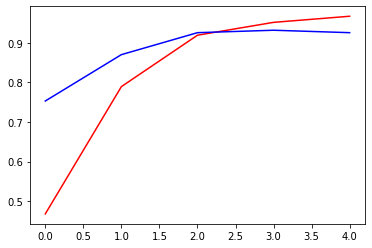

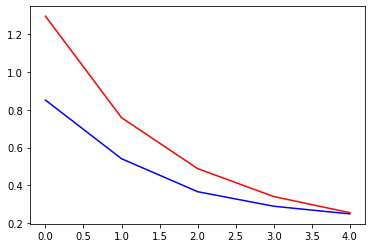

In [21]:
## finetuning

plt.figure(0)
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'b')

plt.figure(1)
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')

plt.show()